In [1]:
import sys
sys.path.append('..')

from olfactory_navigation import Environment, Agent
from olfactory_navigation.agents import FSVI_Agent
from olfactory_navigation.simulation import run_test, SimulationHistory
from olfactory_navigation.test_setups import run_all_starts_test

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import cupy as cp

In [2]:
from cupy.cuda import runtime as cuda_runtime
cuda_runtime.setDevice(0)

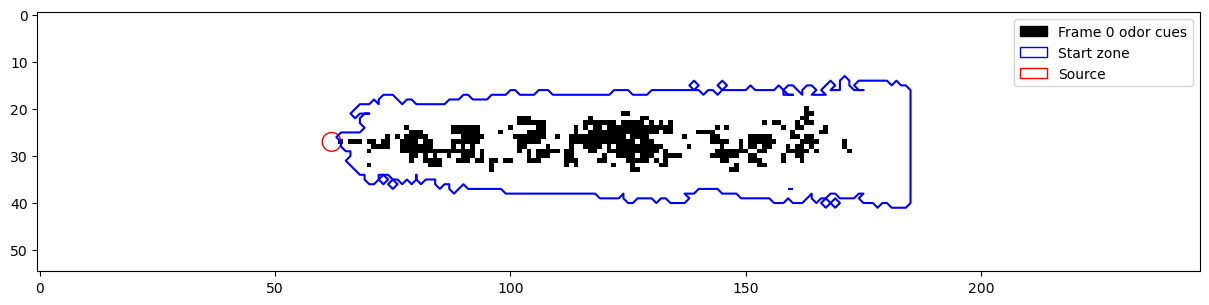

In [3]:
data_path = "/storage/rando/data/nose_data_27_123.npy" # INSERT YOUR PATH
# data_path = "G:\\My Drive\\Documents\\Universita di Genova\\Pimlb work\\nose_data_27_123.npy"

env = Environment(data_file=data_path,
                  data_source_position=[13, 0],
                  source_radius=2,
                  margins=[14, 62],
                  boundary_condition='wrap_vertical',
                  start_zone='odor_present',
                  odor_present_threshold=3e-6)

env.plot()

In [4]:
# env.save()

In [5]:
ag = FSVI_Agent(env)

In [6]:
_ = ag.train(expansions=300, force=True, use_gpu=True)

[06/13/2024, 15:43:48] MDP_policy, not provided. Solving MDP with Value Iteration...
[06/13/2024, 15:43:48] Sending Model to GPU...
[06/13/2024, 15:43:48]     > Done in 0.206s


  0%|          | 0/1000 [00:00<?, ?it/s]

Summary of Value Iteration run
  - Model: 13585-state, 4-action
  - Converged in 918 iterations and 0.9112 seconds
  - Took on average 0.0010s per iteration


Expansions:   0%|          | 0/300 [00:00<?, ?it/s]

Summary of Point Based Value Iteration run
  - Model: 13585 state, 4 action, 3 observations
  - Converged or stopped after 300 expansion steps and 300 backup steps.
  - Resulting value function has 2265 alpha vectors.
  - Converged in 22.0239s

  - Expand function took on average 0.0087s and yielded on average 687.53 beliefs per iteration. (0.0001s/it/belief)
  - Backup function took on average 0.0647s and yielded on average 7.54 alpha vectors per iteration. (0.0004s/it/alpha)
  - Pruning function took on average 0.0000s and yielded on average prunings of 0.00 alpha vectors per iteration.


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


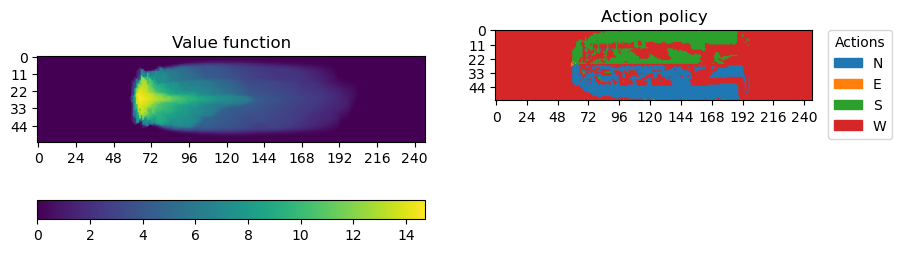

In [7]:
ag.value_function.plot()

In [8]:
# ag.save(force=False, save_environment=False)

In [9]:
hist = run_all_starts_test(ag, use_gpu=True)
# hist = run_test(n=100, agent=ag, time_shift=2400, use_gpu=True)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulations done in 4.699s:
Simulations reached goal: 2368/2393 (25 failures (reached horizon: 25)) (98.96% success)
 - Average step count:                 101.049 +- 105.04 (Successfull only: 91.558 +- 50.30)
 - Extra steps:                        30.015 +- 98.18 (Successful only: 20.165 +- 21.19)
 - Average discounted rewards (ADR):   0.442 +- 0.20 (Successfull only: 0.447 +- 0.20)
 - Tmin/T:                             0.801 +- 0.16 (Successful only: 0.809 +- 0.14)


In [10]:
hist.analysis_df

,y_start,x_start,optimal_steps_count,converged,reached_horizon,steps_taken,discounted_rewards,extra_steps,t_min_over_t
mean,NaN,NaN,NaN,0.989553,0.010447,101.048893,0.442431,30.015462,0.800783
standard_deviation,NaN,NaN,NaN,0.101676,0.101676,105.043909,0.204605,98.179578,0.161587
success_mean,NaN,NaN,NaN,1.0,0.0,91.558277,0.447101,20.164696,0.808847
success_standard_deviation,NaN,NaN,NaN,0.0,0.0,50.300231,0.200585,21.185121,0.142006
run_0,14.0,171.0,120.0,True,False,154.000000,0.212726,34.000000,0.779221
...,...,...,...,...,...,...,...,...,...
run_2388,40.0,178.0,127.0,True,False,225.000000,0.104212,98.000000,0.564444
run_2389,40.0,181.0,130.0,True,False,228.000000,0.101117,98.000000,0.570175
run_2390,40.0,182.0,131.0,True,False,185.000000,0.155780,54.000000,0.708108
run_2391,40.0,183.0,132.0,True,False,228.000000,0.101117,96.000000,0.578947


In [ ]:
hist.save()

Simulations saved to: ./Simulations-s_55_247-n_2393-05102024_164939-horizon_1000.csv
Simulation's analysis saved to: ./Simulations-s_55_247-n_2393-05102024_164939-horizon_1000-analysis.csv


In [9]:
loaded_hist = SimulationHistory.load_from_file('./Simulations-s_55_247-n_2393-05102024_164939-horizon_1000.csv', agent=ag)

Environment "55_247-edge_wrap_vertical-start_odor_present-source_27_62_radius2" loaded from memory


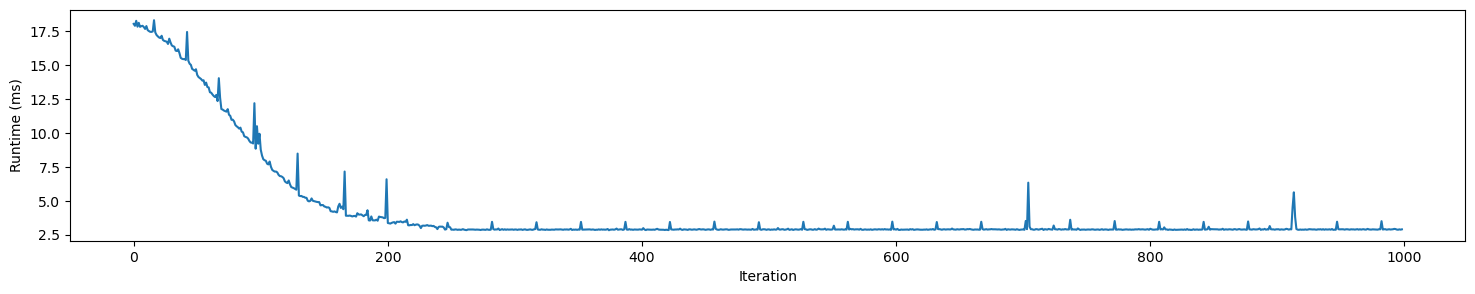

In [10]:
loaded_hist.plot_runtimes()

In [13]:
hist2 = SimulationHistory.load_from_file('./Simulations-s_55_247-n_100-horizon_198-03192024_181337.csv')

Environment "55_247-edge_wrap_vertical-start_odor_present-source_27_62_radius2" loaded from memory


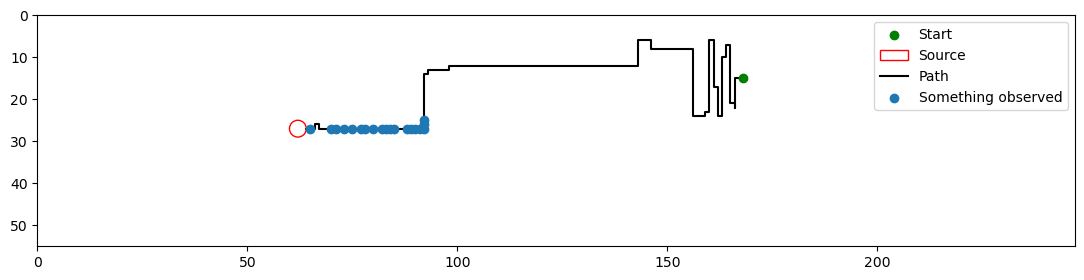

In [15]:
loaded_hist.plot(3)